In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import openpyxl
import xlrd
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from nilearn.connectome import ConnectivityMeasure
from pandas import DataFrame
import scipy as sc
from scipy import io
from scipy.stats import pearsonr
from os.path import join, exists, dirname, basename
from glob import glob
from brainspace import gradient
from random import randint
import nibabel as nib
import seaborn as sns

# FD extract

In [ ]:
# 300명에 맞춘 것, 139 명은 store7에 있어서 로컬에서 접근해야함
N = 300 # 300, 147

if N == 300:
    FD_list = []
    for i in range(len(sub_list)):
        FD_list.append(glob(join(f'eNKI_pasth/{sub_list[i]}/REST_645/func_results_REST_645','FD_metric'))) 
    FD_list=np.array(FD_list).reshape(-1)
    print(len(FD_list))
    
    
    for i, subj in enumerate(sub_list):
        print(f'{i} / {len(sub_list)} {subj}' )

        FD = []
        f = open(FD_list[i], mode='r') # open FD file
        while True:
            c = f.read()
            if c == '':
                break
        #     print(c)
            FD.append(c) # make FD list
        FD = FD[0].split('\n')[:-1] # remove ''
        FD = np.array([float(i) for i in FD[:-1]]) # str2float
        np.save(join('data_path', subj, 'FD.npy'), FD) # save

elif N == 147:
    # eNKI n147 add file
    FD_list = []
    for i in range(len(sub_list2)):
        FD_list.append(glob(join(f'eNKI_path2/{sub_list2[i]}/REST_645/func_results_REST_645','FD_metric'))) 
    FD_list=np.array(FD_list).reshape(-1)
    print(len(FD_list))
    
    
    for i, subj in enumerate(sub_list2):
        print(f'{i} / {len(sub_list2)} {subj}' )

        FD = []
        f = open(FD_list[i], mode='r') # open FD file
        while True:
            c = f.read()
            if c == '':
                break
        #     print(c)
            FD.append(c) # make FD list
        FD = FD[0].split('\n')[:-1] # remove ''
        FD = np.array([float(i) for i in FD[:-1]]) # str2float
        np.save(join('data_path', subj, 'FD.npy'), FD) # save

[0.20023694 0.1973535  0.1421071  0.0929191  0.0875095  0.08217744
 0.06125538 0.05409639 0.04254647 0.03979818]


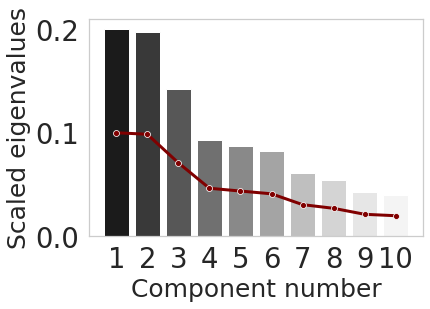

In [1125]:
grp_aff = np.load(join('HCP_path', f'aff_grp_conn_mat_pear_top10_BNA_rmsubcor.npy'))

comp_num = 10

emb_dm = gradient.embedding.DiffusionMaps(n_components = comp_num)
emb_dm.fit(grp_aff)
ref_lam_dm = emb_dm.lambdas_ 
ref_PC_dm = emb_dm.maps_ 

sns.barplot(x = list(range(1,11) ), y = ref_lam_dm/ref_lam_dm.sum(), palette='Greys_r') # 'ch:2,r=1,l=.6' Greys_r
sns.lineplot(x = list(range(10) ), y = ref_lam_dm/(2*ref_lam_dm.sum()), marker='o', color='maroon', linewidth=3, markersize=6) # 'ch:2,r=1,l=.6' Greys_r

plt.xlabel('Component number', fontsize = 25)
plt.ylabel('Scaled eigenvalues', fontsize = 25)
# plt.title('Explained Variance')
plt.grid(False)

print(ref_lam_dm/ref_lam_dm.sum())

# Clustering

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, OneHotEncoder
# FD is in upper cell

age = demo['Age']
sex = demo['Sex (M1F2)']
BMI = demo['BMI']
WHR = demo['WHR']
EDE_Q_R = demo['Restraint']
EDE_Q_E_con = demo['Eating concern']
EDE_Q_S_con = demo['Shape concern']
EDE_Q_W_con = demo['Weight concern']
TFEQ_F1 = demo['Factor 1']
TFEQ_F2 = demo['Factor 2']
TFEQ_F3 = demo['Factor 3']
FD = demo['mean_FD']

EDE_Q_global = (EDE_Q_R+EDE_Q_E_con+EDE_Q_S_con+EDE_Q_W_con) / 4
EDE_Q_con = (EDE_Q_E_con+EDE_Q_S_con+EDE_Q_W_con) / 3

scaler = MinMaxScaler() # MinMaxScaler StandardScaler MaxAbsScaler RobustScaler
 
y_target = np.array(BMI)
y_scaled = scaler.fit_transform(np.array(y_target).reshape(-1,1)).reshape(-1)

demographic_label = ['age', 'BMI', 'WHR', 'FD', 'EDE_Q_R', 'EDE_Q_E_con', 'EDE_Q_S_con', 'EDE_Q_W_con', 'TFEQ_F1', 'TFEQ_F2', 'TFEQ_F3']

for i, x in enumerate([age, BMI, WHR, FD, EDE_Q_R, EDE_Q_E_con, EDE_Q_S_con, EDE_Q_W_con, TFEQ_F1, TFEQ_F2, TFEQ_F3]):
    print(demographic_label[i], ':', np.array(x).shape, np.round(x.mean(),2), np.round(x.std(),2), '      Min Max', np.round(x.min(),2), np.round(x.max(),2))
    
print('Sex F M : ',len(np.where(sex==2)[0]), len(np.where(sex==1)[0]))

In [ ]:
print(len(np.where((BMI>=18.5)&(BMI<25))[0]))
print(len(np.where((BMI>=25)&(BMI<30))[0]))
print(len(np.where(BMI>=30)[0]))

# Age FD correlation

In [ ]:
scaler = StandardScaler()
age_scaled = scaler.fit_transform(np.array(age).reshape(-1,1)).reshape(-1)
FD_scaled = scaler.fit_transform(np.array(FD).reshape(-1,1)).reshape(-1)

r,p = sc.stats.pearsonr(age_scaled,FD_scaled)
print(f'r : {np.round(r,3)}, p : {p}')
plt.figure(1, figsize = (9,7))
sns.regplot(x='Age', y='mean_FD', data=demo, color='slategrey')
plt.xlabel('Age')
plt.ylabel('Head motion \n(mean framewise displacement)')

In [ ]:
df_eNKI_total = pd.concat([age, BMI, FD, EDE_Q_R, EDE_Q_con, EDE_Q_E_con, EDE_Q_S_con, EDE_Q_W_con, TFEQ_F1, TFEQ_F2, TFEQ_F3], axis=1)
df_eNKI_total.columns=['age', 'BMI', 'FD', 'EDE_Q_R', 'EDE_Q_con', 'EDE_Q_E_con', 'EDE_Q_S_con', 'EDE_Q_W_con', 'TFEQ_F1', 'TFEQ_F2', 'TFEQ_F3'] # column rename

group_num = 2

if group_num == 3:
    # age graoup masking
    old_mask = df_eNKI_total['age']>70
    middle_mask = (df_eNKI_total['age']<=70) & (df_eNKI_total['age']>30)
    young_mask = df_eNKI_total['age']<=30


    # define age group
    df_eNKI_total['age_group'] = None
    df_eNKI_total['age_group'][old_mask] = 'old'
    df_eNKI_total['age_group'][middle_mask] = 'middle'
    df_eNKI_total['age_group'][young_mask] = 'young'


    FD_old = df_eNKI_total[df_eNKI_total['age_group'] == 'old']['FD']
    FD_middle = df_eNKI_total[df_eNKI_total['age_group'] == 'middle']['FD']
    FD_young = df_eNKI_total[df_eNKI_total['age_group'] == 'young']['FD']

    [s_0,p_0] = sc.stats.f_oneway(FD_old, FD_middle, FD_young)
    print(f'F : {s_0}, p : {p_0}')

elif group_num == 2:
    # age graoup masking
    grp1_mask = df_eNKI_total['age']>70 # 47 70
    grp2_mask = df_eNKI_total['age']<=30 # 47 30

    # define age group
    df_eNKI_total['age_group'] = None
    df_eNKI_total['age_group'][grp1_mask] = 'Old'
    df_eNKI_total['age_group'][grp2_mask] = 'Young'

    FD_old = df_eNKI_total[df_eNKI_total['age_group'] == 'Old']['FD']
    FD_young = df_eNKI_total[df_eNKI_total['age_group'] == 'Young']['FD']

    [s_0,p_0] = sc.stats.ttest_ind(FD_old, FD_young, equal_var = False)
    print(f't : {s_0}, p : {p_0}')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, OneHotEncoder
# Lemon

age_lemon = demo_lemon['Age']
sex_lemon = demo_lemon['Gender_ 1=male_2=female']
BMI_lemon = demo_lemon['BMI (kg/m2)']
TFEQ_F1_lemon = demo_lemon['FEV_KK']
TFEQ_F2_lemon = demo_lemon['FEV_STOER']
TFEQ_F3_lemon = demo_lemon['FEV_HUNGER']

scaler = MinMaxScaler() # MinMaxScaler StandardScaler MaxAbsScaler RobustScaler
 
y_target = np.array(BMI_lemon)
y_scaled = scaler.fit_transform(np.array(y_target).reshape(-1,1)).reshape(-1)
    
demographic_label = ['age', 'BMI', 'TFEQ_F1', 'TFEQ_F2', 'TFEQ_F3']

for i, x in enumerate([age_lemon, BMI_lemon, TFEQ_F1_lemon, TFEQ_F2_lemon, TFEQ_F3_lemon]):
    print(demographic_label[i], ':', np.array(x).shape, np.round(x.mean(),2), np.round(x.std(),2), '      Min Max', np.round(x.min(),2), np.round(x.max(),2))
    
print('Sex F M : ',len(np.where(sex_lemon==2)[0]), len(np.where(sex_lemon==1)[0]))

In [ ]:
print(len(np.where((BMI_lemon>=18.5)&(BMI_lemon<25))[0]))
print(len(np.where((BMI_lemon>=25)&(BMI_lemon<30))[0]))
print(len(np.where(BMI_lemon>=30)[0]))

# Demographinc statistic

In [ ]:
Dis_demo = [age, BMI, TFEQ_F1, TFEQ_F2, TFEQ_F3]
Rep_demo = [age_lemon, BMI_lemon, TFEQ_F1_lemon, TFEQ_F2_lemon, TFEQ_F3_lemon]
demographic_label = ['age', 'BMI', 'TFEQ_F1', 'TFEQ_F2', 'TFEQ_F3']

for i in range(len(Dis_demo)):

    [s_0,p_0] = sc.stats.ttest_ind(Dis_demo[i], Rep_demo[i], equal_var = False, axis=0)
    print(f'{demographic_label[i]} : {p_0}')

In [ ]:
# discovery, replication dataset sex chi-square

chi_ob = [282, 142] # discovery(eNKI) F:M
chi_expect = [75,137] # replication(Lemon) F:M

chi_stat, chi_pval = sc.stats.chisquare(chi_ob, f_exp=chi_expect, axis=None, ddof = [0,1,2])

print(chi_stat)
print(chi_pval)

# Eigenvector comparison

In [798]:
grad_list_znorm_stacked_regout_Scha200_MNI = np.load(join(main_path, 'result/latent_210/revision/grad_list_znorm_stacked_regout_agesex_Scha200_MNI.npy'))
grad_list_znorm_stacked_regout_BNA = np.load(join(main_path, 'result/latent_210/main_result/AE/grad_list_znorm_stacked_regout.npy')) # Main eigenvector data


# Split age group
old_mask = demo['Age']>70
middle_mask = (demo['Age']<=70) & (demo['Age']>30)
young_mask = demo['Age']<=30

old_idx = demo[old_mask].index
middle_idx = demo[middle_mask].index
young_idx = demo[young_mask].index

# Split eigenvector group

grad_old_BNA = grad_list_znorm_stacked_regout_BNA[old_idx]
grad_middle_BNA = grad_list_znorm_stacked_regout_BNA[middle_idx]
grad_young_BNA = grad_list_znorm_stacked_regout_BNA[young_idx]

grad_old_Scha200_MNI = grad_list_znorm_stacked_regout_Scha200_MNI[old_idx]
grad_middle_Scha200_MNI = grad_list_znorm_stacked_regout_Scha200_MNI[middle_idx]
grad_young_Scha200_MNI = grad_list_znorm_stacked_regout_Scha200_MNI[young_idx]

In [ ]:
# Main eigen comparison
[F_BNA, p_FBNA] = sc.stats.f_oneway(grad_old_BNA, grad_middle_BNA, grad_young_BNA, axis=0)
[t_BNA, p_tBNA] = sc.stats.ttest_ind(grad_old_BNA, grad_young_BNA, equal_var = False)

# Schafer200 comparison
[F_200, p_F200] = sc.stats.f_oneway(grad_old_Scha200_MNI, grad_middle_Scha200_MNI, grad_young_Scha200_MNI, axis=0)
[t_200, p_t200] = sc.stats.ttest_ind(grad_old_Scha200_MNI, grad_young_Scha200_MNI, equal_var = False)


# BNA, Schafer200 comparison
[t_old, p_old] = sc.stats.ttest_ind(grad_old_BNA, grad_old_Scha200_MNI, equal_var = False, axis=1)
[t_middle, p_middle] = sc.stats.ttest_ind(grad_middle_BNA, grad_middle_Scha200_MNI, equal_var = False, axis=1)
[t_young, p_young] = sc.stats.ttest_ind(grad_young_BNA, grad_young_Scha200_MNI, equal_var = False, axis=1)

p_FBNA_fdr = sm.stats.multitest.multipletests(p_FBNA,alpha=0.05,method='fdr_bh')
p_tBNA_fdr = sm.stats.multitest.multipletests(p_tBNA,alpha=0.05,method='fdr_bh')
p_F200_fdr = sm.stats.multitest.multipletests(p_F200,alpha=0.05,method='fdr_bh')
p_t200_fdr = sm.stats.multitest.multipletests(p_t200,alpha=0.05,method='fdr_bh')
p_old_fdr = sm.stats.multitest.multipletests(p_old,alpha=0.05,method='fdr_bh')
p_middle_fdr = sm.stats.multitest.multipletests(p_middle,alpha=0.05,method='fdr_bh')
p_young_fdr = sm.stats.multitest.multipletests(p_young,alpha=0.05,method='fdr_bh')

for i in [p_FBNA_fdr, p_tBNA_fdr, p_F200_fdr, p_t200_fdr, p_old_fdr, p_middle_fdr, p_young_fdr]:
    print(i[0].sum())

# Check each cluster score according to age

In [ ]:
df_eNKI_total = pd.concat([age, BMI, EDE_Q_R, EDE_Q_con, EDE_Q_E_con, EDE_Q_S_con, EDE_Q_W_con, TFEQ_F1, TFEQ_F2, TFEQ_F3], axis=1)
df_eNKI_total.columns=['age', 'BMI', 'EDE_Q_R', 'EDE_Q_con', 'EDE_Q_E_con', 'EDE_Q_S_con', 'EDE_Q_W_con', 'TFEQ_F1', 'TFEQ_F2', 'TFEQ_F3'] # column rename

# age graoup masking
old_mask = df_eNKI_total['age']>70
middle_mask = (df_eNKI_total['age']<=70) & (df_eNKI_total['age']>30)
young_mask = df_eNKI_total['age']<=30

# define age group
df_eNKI_total['age_group'] = None
df_eNKI_total['age_group'][old_mask] = 'old'
df_eNKI_total['age_group'][middle_mask] = 'middle'
df_eNKI_total['age_group'][young_mask] = 'young'

# extract otest subject
df_eNKI_otest = df_eNKI_total.loc[otest_idx] 
df_eNKI_otest['subgroup'] = cluster_label_AE+1

main_subgrp1 = df_eNKI_otest[df_eNKI_otest['subgroup']==1]
main_subgrp2 = df_eNKI_otest[df_eNKI_otest['subgroup']==2]
main_subgrp3 = df_eNKI_otest[df_eNKI_otest['subgroup']==3]

In [ ]:
import seaborn as sns

df_data = main_subgrp3

fig, axes = plt.subplots(2, 4, figsize=(35, 15))


sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[0,0], x = 'age_group' , y = 'EDE_Q_R', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'middle', 'young'])
sns.swarmplot(ax = axes[0,0], x = 'age_group' , y = 'EDE_Q_R' , data = df_data, color = 'k', size = 4, order = ['old', 'middle', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[0,1], x = 'age_group' , y = 'EDE_Q_con', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'middle', 'young'])
sns.swarmplot(ax = axes[0,1], x = 'age_group' , y = 'EDE_Q_con' , data = df_data, color = 'k', size = 4, order = ['old', 'middle', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[0,2], x = 'age_group' , y = 'EDE_Q_E_con', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'middle', 'young'])
sns.swarmplot(ax = axes[0,2], x = 'age_group' , y = 'EDE_Q_E_con' , data = df_data, color = 'k', size = 4, order = ['old', 'middle', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[0,3], x = 'age_group' , y = 'EDE_Q_S_con', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'middle', 'young'])
sns.swarmplot(ax = axes[0,3], x = 'age_group' , y = 'EDE_Q_S_con' , data = df_data, color = 'k', size = 4, order = ['old', 'middle', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[1,0], x = 'age_group' , y = 'EDE_Q_W_con', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'middle', 'young'])
sns.swarmplot(ax = axes[1,0], x = 'age_group' , y = 'EDE_Q_W_con' , data = df_data, color = 'k', size = 4, order = ['old', 'middle', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[1,1], x = 'age_group' , y = 'TFEQ_F1', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'middle', 'young'])
sns.swarmplot(ax = axes[1,1], x = 'age_group' , y = 'TFEQ_F1' , data = df_data, color = 'k', size = 4, order = ['old', 'middle', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[1,2], x = 'age_group' , y = 'TFEQ_F2', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'middle', 'young'])
sns.swarmplot(ax = axes[1,2], x = 'age_group' , y = 'TFEQ_F2' , data = df_data, color = 'k', size = 4, order = ['old', 'middle', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[1,3], x = 'age_group' , y = 'TFEQ_F3', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'middle', 'young'])
sns.swarmplot(ax = axes[1,3], x = 'age_group' , y = 'TFEQ_F3' , data = df_data, color = 'k', size = 4, order = ['old', 'middle', 'young'])

In [ ]:
import seaborn as sns

df_data = main_subgrp1[(main_subgrp1['age_group'] == 'old') | (main_subgrp1['age_group'] == 'young')]

fig, axes = plt.subplots(2, 4, figsize=(35, 15))


sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[0,0], x = 'age_group' , y = 'EDE_Q_R', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'young'])
sns.swarmplot(ax = axes[0,0], x = 'age_group' , y = 'EDE_Q_R' , data = df_data, color = 'k', size = 4, order = ['old', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[0,1], x = 'age_group' , y = 'EDE_Q_con', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'young'])
sns.swarmplot(ax = axes[0,1], x = 'age_group' , y = 'EDE_Q_con' , data = df_data, color = 'k', size = 4, order = ['old', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[0,2], x = 'age_group' , y = 'EDE_Q_E_con', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'young'])
sns.swarmplot(ax = axes[0,2], x = 'age_group' , y = 'EDE_Q_E_con' , data = df_data, color = 'k', size = 4, order = ['old', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[0,3], x = 'age_group' , y = 'EDE_Q_S_con', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'young'])
sns.swarmplot(ax = axes[0,3], x = 'age_group' , y = 'EDE_Q_S_con' , data = df_data, color = 'k', size = 4, order = ['old', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[1,0], x = 'age_group' , y = 'EDE_Q_W_con', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'young'])
sns.swarmplot(ax = axes[1,0], x = 'age_group' , y = 'EDE_Q_W_con' , data = df_data, color = 'k', size = 4, order = ['old', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[1,1], x = 'age_group' , y = 'TFEQ_F1', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'young'])
sns.swarmplot(ax = axes[1,1], x = 'age_group' , y = 'TFEQ_F1' , data = df_data, color = 'k', size = 4, order = ['old', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[1,2], x = 'age_group' , y = 'TFEQ_F2', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'young'])
sns.swarmplot(ax = axes[1,2], x = 'age_group' , y = 'TFEQ_F2' , data = df_data, color = 'k', size = 4, order = ['old', 'young'])

sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(ax = axes[1,3], x = 'age_group' , y = 'TFEQ_F3', data = df_data, palette = 'gist_yarg', width=0.5, order = ['old', 'young'])
sns.swarmplot(ax = axes[1,3], x = 'age_group' , y = 'TFEQ_F3' , data = df_data, color = 'k', size = 4, order = ['old', 'young'])

# Compare old, young of each subgroup

In [ ]:
score_name = 'TFEQ_F1' # BMI TFEQ_F1 TFEQ_F2 TFEQ_F3


df_plot = df_eNKI_otest[(df_eNKI_otest['age_group'] == 'old') | (df_eNKI_otest['age_group'] == 'young')]

plt.figure(1,(7,5))
sns.set(style = 'whitegrid', font_scale=2.5)
g = sns.pointplot(x = 'subgroup' , y = score_name, hue = 'age_group', data = df_plot,  palette = "gray", plot_kws=dict(alpha=1))
# plt.title(score_name, fontsize = 25)
# plt.xlabel('Subtype', fontsize = 25)
# plt.ylabel(score_name, fontsize = 25)
plt.xticks([])
plt.ylim([0,15]) # [18,33] # [2,12]
plt.yticks([3,6,9,12,15]) # [20,24,28,32] # [3,6,9,12]
plt.legend(fontsize = 20, loc = 'upper right')
plt.legend(['Old', 'Young'])
# plt.legend([],[], frameon=False) # legend swith
plt.setp(g.collections, alpha = 1)
plt.setp(g.lines[1:4], alpha=.1)  
plt.setp(g.lines[5:8], alpha=.1)  

# sns.swarmplot(x = 'ASD Subtype' , y = 'ADOS Communication', data = df_plot, color = '.25')

is_Dis = df_plot['age_group'] == 'old'
is_Rep = df_plot['age_group'] == 'young'
is_sub1 = df_plot['subgroup'] == 1
is_sub2 = df_plot['subgroup'] == 2
is_sub3 = df_plot['subgroup'] == 3

chi_ob=[]
chi_expect=[]

for num in [is_sub1, is_sub2, is_sub3]:
    print('p value : ',sc.stats.ttest_ind(df_plot[num & is_Dis][score_name],df_plot[num & is_Rep][score_name])[1])
    print('Discovery score : ',df_plot[num & is_Dis][score_name].mean(),' +- ',df_plot[num & is_Dis][score_name].std())
    print('Replication score : ',df_plot[num & is_Rep][score_name].mean(),' +- ',df_plot[num & is_Rep][score_name].std())
    print(' ')
    chi_expect.append(df_plot[num & is_Dis][score_name].mean())
    chi_ob.append(df_plot[num & is_Rep][score_name].mean())

# Chi square test between Discovery and Replication
print(chi_ob)
print(chi_expect)

chi_stat, chi_pval = sc.stats.chisquare(chi_ob, f_exp=chi_expect, axis=None, ddof = [0,1,2])

print('')
print(chi_stat)
print(chi_pval)

In [ ]:
for i, data in enumerate([main_subgrp1, main_subgrp2, main_subgrp3]):
    print(f'subgroup {i+1}')
    for score in ['TFEQ_F1', 'TFEQ_F2', 'TFEQ_F3']:

        data_xyz = data
        data_score = score

        data_x = data_xyz[data_xyz['age_group'] =='old'][data_score]
        data_y = data_xyz[data_xyz['age_group'] =='middle'][data_score]
        data_z = data_xyz[data_xyz['age_group'] =='young'][data_score]

        f,p = sc.stats.f_oneway(data_x, data_y, data_z)
        t12, p12 = sc.stats.ttest_ind(data_x, data_y, equal_var = False, axis=0)
        t13, p13 = sc.stats.ttest_ind(data_x, data_z, equal_var = False, axis=0)
        t23, p23 = sc.stats.ttest_ind(data_y, data_z, equal_var = False, axis=0)
        
        p_0_fdr = sm.stats.multitest.multipletests([p, p12, p13, p23] ,alpha=0.05,method='fdr_bh') # FDR correction

        
        print(score)
        print(f'n = {len(data_x)}, {len(data_y)}, {len(data_z)}')
        print(f'F : {np.round(f,4)}, p : {np.round(p_0_fdr[1][0],4)}')
        print(f't12 : {np.round(t12,4)}, p12 : {np.round(p_0_fdr[1][1],4)}')
        print(f't13 : {np.round(t13,4)}, p13 : {np.round(p_0_fdr[1][2],4)}')
        print(f't23 : {np.round(t23,4)}, p23 : {np.round(p_0_fdr[1][3],4)}')
        print('')

# Plot one

In [ ]:
import seaborn as sns

y = TFEQ_F1 # BMI WHR EDE_Q_R EDE_Q_con EDE_Q_E_con EDE_Q_S_con EDE_Q_W_con TFEQ_F1 TFEQ_F2 TFEQ_F3    age sex age_lemon sex_lemon

idx = otest_idx # itrain_idx itest_idx otest_idx

df = pd.DataFrame([np.array(y)[idx], cluster_label_AE+1]) # [np.array(y)[idx], cluster_label_AE]  [cluster_label_lemon]
df = df.T
df.columns = ['Score','Subtype']

plt.figure(1,(7,7))
sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(x = df.columns[1] , y = df.columns[0], data = df, palette = 'gist_yarg', width=0.5)
sns.swarmplot(x = df.columns[1] , y = df.columns[0], data = df, color = 'k', size = 4)
plt.xlabel('eNKI')
plt.ylabel('BMI')
plt.ylim([-1,20])
# plt.legend(loc = 'upper right')
# plt.legend(['Subgroup1', 'Subgroup2', 'Subgroup3'], fontsize = 20, loc = 'upper right')
# plt.yticks([20,25,30,35,40])

# each subject IG

In [574]:
IG_testsum = np.load(join('data_path/result/latent_210/main_result/AE','IG', 'IG_testsum.npy'))

AE_cluster_label = np.load(join('data_path/result/latent_210/main_result/AE/AE_cluster_label_idx.npy'))
sub1_idx = np.where(AE_cluster_label==0)
sub2_idx = np.where(AE_cluster_label==1)
sub3_idx = np.where(AE_cluster_label==2)

In [1004]:
IG1_testsum = IG_testsum[:, :210]
IG2_testsum = IG_testsum[:, 210:420]
IG3_testsum = IG_testsum[:, 420:]

IG123_testsum = (IG1_testsum + IG2_testsum + IG3_testsum)/3 # the meaan of IG1, 2, 3

In [1013]:
# whole testset
sub1_IG_testmean = IG_testsum[sub1_idx].mean(axis=0)
sub2_IG_testmean = IG_testsum[sub2_idx].mean(axis=0)
sub3_IG_testmean = IG_testsum[sub3_idx].mean(axis=0)

# IG123 whole testset
sub1_IG123_testmean = IG123_testsum[sub1_idx].mean(axis=0)
sub2_IG123_testmean = IG123_testsum[sub2_idx].mean(axis=0)
sub3_IG123_testmean = IG123_testsum[sub3_idx].mean(axis=0)


## std
sub1_IG_teststd = IG_testsum[sub1_idx].std(axis=0)
sub2_IG_teststd = IG_testsum[sub2_idx].std(axis=0)
sub3_IG_teststd = IG_testsum[sub3_idx].std(axis=0)

sub1_IG123_teststd = IG123_testsum[sub1_idx].std(axis=0)
sub2_IG123_teststd = IG123_testsum[sub2_idx].std(axis=0)
sub3_IG123_teststd = IG123_testsum[sub3_idx].std(axis=0)

## sem (standard error of mean) std / (n)^(1/2)
sub1_IG_testsem = sub1_IG_teststd / (len(sub1_idx[0])) **(1/2)
sub2_IG_testsem = sub2_IG_teststd / (len(sub2_idx[0])) **(1/2)
sub3_IG_testsem = sub3_IG_teststd / (len(sub3_idx[0])) **(1/2)

sub1_IG123_testsem = sub1_IG123_teststd / (len(sub1_idx[0])) **(1/2)
sub2_IG123_testsem = sub2_IG123_teststd / (len(sub2_idx[0])) **(1/2)
sub3_IG123_testsem = sub3_IG123_teststd / (len(sub3_idx[0])) **(1/2)

## subgroup 1
sub1_IG1_testmean = sub1_IG_testmean[:210];    sub1_IG1_teststd = sub1_IG_teststd[:210];    sub1_IG1_testsem = sub1_IG_testsem[:210]
sub1_IG2_testmean = sub1_IG_testmean[210:420]; sub1_IG2_teststd = sub1_IG_teststd[210:420]; sub1_IG2_testsem = sub1_IG_testsem[210:420]
sub1_IG3_testmean = sub1_IG_testmean[420:];    sub1_IG3_teststd = sub1_IG_teststd[420:];    sub1_IG3_testsem = sub1_IG_testsem[420:]

## subgroup 2
sub2_IG1_testmean = sub2_IG_testmean[:210];    sub2_IG1_teststd = sub2_IG_teststd[:210];    sub2_IG1_testsem = sub2_IG_testsem[:210]
sub2_IG2_testmean = sub2_IG_testmean[210:420]; sub2_IG2_teststd = sub2_IG_teststd[210:420]; sub2_IG2_testsem = sub2_IG_testsem[210:420]
sub2_IG3_testmean = sub2_IG_testmean[420:];    sub2_IG3_teststd = sub2_IG_teststd[420:];    sub2_IG3_testsem = sub2_IG_testsem[420:]

## subgroup 3
sub3_IG1_testmean = sub3_IG_testmean[:210];    sub3_IG1_teststd = sub3_IG_teststd[:210];    sub3_IG1_testsem = sub3_IG_testsem[:210]
sub3_IG2_testmean = sub3_IG_testmean[210:420]; sub3_IG2_teststd = sub3_IG_teststd[210:420]; sub3_IG2_testsem = sub3_IG_testsem[210:420]
sub3_IG3_testmean = sub3_IG_testmean[420:];    sub3_IG3_teststd = sub3_IG_teststd[420:];    sub3_IG3_testsem = sub3_IG_testsem[420:]

In [ ]:
path_work = join(main_path,'result/latent_210')

yeo7net_withSub_label = np.load(join(path_work, 'main_result', 'AE', 'BNA2yeo7.npy'), allow_pickle = True).item()['Label_name']
BNA2yeo7_withSub_idx = np.load(join(path_work, 'main_result', 'AE', 'BNA2yeo7.npy'), allow_pickle = True).item()['BNA2yeo7_withSub_idx']

yeo7net = yeo7net_withSub_label[:7]
BNA2yeo7 = BNA2yeo7_withSub_idx[:210]

## mean
# data_list = [sub1_IG1_testmean, sub1_IG2_testmean, sub1_IG3_testmean]
# data_list = [sub2_IG1_testmean, sub2_IG2_testmean, sub2_IG3_testmean]
# data_list = [sub3_IG1_testmean, sub3_IG2_testmean, sub3_IG3_testmean]

## std
# data_list = [sub1_IG1_teststd, sub1_IG2_teststd, sub1_IG3_teststd]
# data_list = [sub2_IG1_teststd, sub2_IG2_teststd, sub2_IG3_teststd]
# data_list = [sub3_IG1_teststd, sub3_IG2_teststd, sub3_IG3_teststd]

## sem
# data_list = [sub1_IG1_testsem, sub1_IG2_testsem, sub1_IG3_testsem]
# data_list = [sub2_IG1_testsem, sub2_IG2_testsem, sub2_IG3_testsem]
# data_list = [sub3_IG1_testsem, sub3_IG2_testsem, sub3_IG3_testsem]

## IG123
# data_list = [sub1_IG123_testmean, sub2_IG123_testmean, sub3_IG123_testmean]
# data_list = [sub1_IG123_teststd, sub2_IG123_teststd, sub3_IG123_teststd]
data_list = [sub1_IG123_testsem, sub2_IG123_testsem, sub3_IG123_testsem]



value_set = 'abs' # abs pos neg

for i in data_list:

#     data = np.load(join(path_work, 'main_result/AE', f'{i}')) # for MANOVA
    data = i # for DC
    
    if value_set == 'abs':
        data_yeo = np.array([abs(data)[BNA2yeo7==i].mean() for i in range(BNA2yeo7.max()+1)])
        
    if value_set == 'pos':
        data_yeo = np.array([data[BNA2yeo7==i][data[BNA2yeo7==i]>0].mean() for i in range(BNA2yeo7.max()+1)])
        
    if value_set == 'neg':
        data_yeo = np.array([data[BNA2yeo7==i][data[BNA2yeo7==i]<0].mean() for i in range(BNA2yeo7.max()+1)])
        
    print(data_yeo)
    plot_spider(data_yeo)

# Data Bootstrapping

In [846]:
grad_list_znorm_stacked_regout = np.load(join(main_path,'result/latent_210/revision/grad_list_znorm_stacked_regout_agesex_Scha200_MNI.npy'))
grad_list_znorm_stacked_regout.shape

(424, 600)

In [ ]:
import time
from sklearn.utils import resample

save_path = join(main_path,'result/latent_210/Bootstrap')

np.array(grad_list_znorm_stacked_regout)
X = np.array([i for i in range(len(grad_list_znorm_stacked_regout))])

for boot_num in range(1000):
    trial = f'Trial_{str(boot_num).zfill(5)}'
    print(trial)
    
    start_time = time.time()
    
    if not(os.path.isdir(join(save_path,f'{trial}'))):
        print(f'Make folder {trial}')
        os.makedirs(os.path.join(save_path,f'{trial}'))
    else:
        print('pass')

    resam_idx = resample(X, n_samples = int(len(X)*0.9), random_state=None, replace = False) # Data leakage 방지, 중복 X

    np.save(join(save_path,trial,'resample_idx.npy'), resam_idx)
 
    # print(resam_idx)

    # DataLoader
    from torch.utils.data import TensorDataset

    x_data = torch.tensor(grad_list_znorm_stacked_regout) # FC_list_vec_threshed FC_list_vec_removed FC_list_vec FC_list_vec_removed_choice
    y_data = torch.tensor(y_scaled) # y_scaled y_choice_scaled

    nsbj = len(resam_idx)

    # list_idx = np.random.permutation(np.arange(nsbj))
    itrain_idx = resam_idx[:int(nsbj*0.6)]         
    itest_idx = resam_idx[int(nsbj*0.6):int(nsbj*0.8)]       
    otest_idx = resam_idx[int(nsbj*0.8):]          

    np.save(join(save_path,trial,'subj_idx.npy'),{'itrain_idx' : itrain_idx, 'itest_idx': itest_idx, 'otest_idx': otest_idx})

    x_train = x_data[itrain_idx]
    x_valid = x_data[itest_idx]
    x_test = x_data[otest_idx]

    y_train = y_data[itrain_idx]
    y_valid = y_data[itest_idx]
    y_test = y_data[otest_idx]

    train_ds = TensorDataset(x_train, y_train)
    valid_ds = TensorDataset(x_valid, y_valid)
    test_ds = TensorDataset(x_test, y_test)

    from torch.utils.data import DataLoader
    # from torch_geometric.data import DataLoader

    bs_train = 10
    bs_valid = 10
    bs_test = 10

    train_loader = DataLoader(train_ds, batch_size=bs_train, shuffle=False)
    valid_loader = DataLoader(valid_ds, batch_size=bs_valid, shuffle=False)
    test_loader = DataLoader(test_ds, batch_size=bs_test, shuffle=False)

    print(f'train : {len(itrain_idx)}, valid : {len(itest_idx)}, test : {len(otest_idx)}')

    # Model Train
    print('Model train start')
    
    from copy import deepcopy
    from torch.optim import Adam, lr_scheduler

    layer = 'AE'

    if layer == 'AE':
        model = AutoEncoder().to(device) # AutoEncoder LinearVAE
    elif layer == 'VAE':
        model = LinearVAE().to(device) # AutoEncoder LinearVAE

    model_children = list(model.children())

    epochs = 500
    lr = 0.0001
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#     RHO = 0.1

    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.1)
    lr_decay = lr_scheduler.StepLR(optimizer, step_size = 10 ,gamma=0.95)
    criterion = nn.MSELoss(reduction = 'sum')
    criterion_reg = nn.MSELoss(reduction = 'sum') # nn.CrossEntropyLoss() nn.MSELoss()

    best_model = deepcopy(model)
    best_val_loss = np.inf

    train_loss_total = []
    val_loss_total = []
    recon_loss_total_train = []
    reg_loss_total_train = []
    recon_loss_total_valid = []
    reg_loss_total_valid = []

    for epoch in range(epochs):
    #     print(f"Epoch {epoch+1} of {epochs}")
        train_epoch_loss, val_epoch_loss, x_train, x_hat_train, x_valid, x_hat_valid, recon_loss_list_train, recon_loss_list_valid, latent_train, latent_valid= fit(model, train_loader, valid_loader, layer, loss_show=False)


        train_loss_total.append(train_epoch_loss)
        val_loss_total.append(val_epoch_loss)
        recon_loss_total_train.append(recon_loss_list_train)
    #     reg_loss_total_train.append(reg_loss_list_train)
        recon_loss_total_valid.append(recon_loss_list_valid)
    #     reg_loss_total_valid.append(reg_loss_list_valid)

        if val_epoch_loss < best_val_loss:
#             print('[Updated New Record!]')
            best_train_loss = train_epoch_loss
            best_val_loss = val_epoch_loss
            best_model = deepcopy(model)
            best_epoch = epoch
    #         best_y_train = y_train
    #         best_y_hat_train = y_hat_train
    #         best_y_valid = y_valid
    #         best_y_hat_valid = y_hat_valid
            best_x_train = x_train
            best_x_hat_train = x_hat_train
            best_x_valid = x_valid
            best_x_hat_valid = x_hat_valid
#         print('')

        if epoch > best_epoch +50:
            print('Stop!')
            break

        lr_decay.step()

    torch.save(best_model.state_dict(), save_path + '/' + trial + '/' 'best_AE_epoch%d.pkl' % best_epoch)
    print("best AE epoch to %d" % (best_epoch + 1))
    print("best AE train_loss to %.4f" % best_train_loss)
    print("best AE val_loss to %.4f" % best_val_loss)

    train_result1, train_result2, train_result3 = output2numpy(x_train, best_x_hat_train, latent_train)
    np.save(join(save_path,trial,'train_results.npy'), {'train_orig' : train_result1, 'train_recon': train_result2, 'train_latent': train_result3})

    valid_result1, valid_result2, valid_result3 = output2numpy(x_valid, best_x_hat_valid, latent_valid)
    np.save(join(save_path,trial,'valid_results.npy'), {'valid_orig' : valid_result1, 'valid_recon': valid_result2, 'valid_latent': valid_result3})

    # Plot Loss
    loss_x = train_loss_total
    loss_y = val_loss_total

    label_x = 'Train loss'
    label_y = 'Valid loss'

    loss_plot(loss_x, loss_y, label_x, label_y)

    np.save(join(save_path,trial,'loss.npy'),{'train_loss' : train_loss_total, 'val_loss': val_loss_total})
    plt.savefig(join(save_path,trial,'loss_plot.png'))
    plt.close('all')

    # Model test
    print('Model test start')
    
    model_result = AutoEncoder().to(device) # AutoEncoder LinearVAE
    model_result.load_state_dict(best_model.state_dict(), strict=False) # best_model torch.load(load_test_model)

    test_loss, x_test, x_hat_test, _, latent_test = validate(model_result, test_loader, layer='AE')

    print(f'test loss: {test_loss:.4f}')

    test_result1, test_result2, test_result3 = output2numpy(x_test, x_hat_test, latent_test)
    np.save(join(save_path,trial,'test_results.npy'), {'test_orig' : test_result1, 'test_recon': test_result2, 'test_latent': test_result3})

    # Kmeans Clustering
    from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

    clusterer = KMeans(n_clusters=3) # KMeans SpectralClustering
    # clusterer.fit_transform(test_result)
    cluster_label = clusterer.fit_predict(test_result3) # train_result valid_result test_result 

    # cluster_label
    label_idx = label_subj(cluster_label)

    np.save(join(save_path,trial,'AE_latent_cluster_label.npy'), cluster_label)

    # Statistical result
    score_plot(trial, otest_idx, cluster_label, save=True, plot_close=True)
    stat_result(trial, otest_idx, cluster_label, save=True, result_show=False)
    
    print(f'{time.time() - start_time} seconds!\n')

In [973]:
trial_num = 'Trial_00401' # 330 612 685

trial_label = np.load(join(save_path, trial_num, 'AE_latent_cluster_label.npy'))
trial_otest_idx = np.load(join(save_path, trial_num, 'subj_idx.npy'), allow_pickle = True).item()['otest_idx']

sub1 = np.where(trial_label==0)[0]
sub2 = np.where(trial_label==1)[0]
sub3 = np.where(trial_label==2)[0]

sub_label = np.zeros(len(trial_label))
sub_label[sub1] = 1
sub_label[sub2] = 3
sub_label[sub3] = 2

In [ ]:
stat_result(trial, trial_otest_idx, sub_label-1, save=False, result_show = True)

In [ ]:
# save TFEQ score

Main_AE_Score = DataFrame([BMI[main_otest_idx], TFEQ_F1[main_otest_idx], TFEQ_F2[main_otest_idx], TFEQ_F3[main_otest_idx]]).T
Main_AE_Score.columns = ['BMI','TFEQ_F1','TFEQ_F2','TFEQ_F3']
Main_AE_Score.reset_index(inplace=True)
Main_AE_Score['Subtype'] = main_cluster_label+1
Main_AE_Score
# Main_AE_Score.to_excel(join(main_path,'result/latent_210/main_result/AE/Main_AE_Score.xlsx'), sheet_name = 'Sheet1', header = True)

In [976]:
df_Schafer200 = pd.DataFrame([BMI, TFEQ_F1, TFEQ_F2, TFEQ_F3]).T
df_Schafer200.columns = ['BMI','TFEQ_F1','TFEQ_F2','TFEQ_F3']
df_Schafer200 = df_Schafer200.loc[trial_otest_idx].reset_index()
df_Schafer200['Subtype'] = sub_label
df_Schafer200['Dataset'] = 'Schafer200'


# Spider plot (Radar plot)

In [7]:
path_work = join(main_path,'result/latent_210')

yeo7net_withSub_label = np.load(join(path_work, 'main_result', 'AE', 'BNA2yeo7.npy'), allow_pickle = True).item()['Label_name']
BNA2yeo7_withSub_idx = np.load(join(path_work, 'main_result', 'AE', 'BNA2yeo7.npy'), allow_pickle = True).item()['BNA2yeo7_withSub_idx']

yeo7net = yeo7net_withSub_label[:7]
BNA2yeo7 = BNA2yeo7_withSub_idx[:210]

In [515]:
def base_region(name):
        region = np.zeros(246)
        region[name]=1
        
        return region
    
visual_BNA = base_region(np.where(BNA2yeo7_withSub_idx==0))
somatomotor_BNA = base_region(np.where(BNA2yeo7_withSub_idx==1))
D_attention_BNA = base_region(np.where(BNA2yeo7_withSub_idx==2))
V_attention_BNA = base_region(np.where(BNA2yeo7_withSub_idx==3))
limbic_BNA = base_region(np.where(BNA2yeo7_withSub_idx==4))
frontoparietal_BNA = base_region(np.where(BNA2yeo7_withSub_idx==5))
default_BNA = base_region(np.where(BNA2yeo7_withSub_idx==6))

net_list = [visual_BNA, somatomotor_BNA, D_attention_BNA, V_attention_BNA, limbic_BNA, frontoparietal_BNA, default_BNA]

for i in range(7):
    np.save(join(main_path,'result/latent_210', 'main_result/AE', 'Yeo7net',yeo7net_withSub_label[i]+'_BNA.npy'),net_list[i])

In [1029]:
def plot_spider(data_yeo):

    from math import pi
    from matplotlib.spines import Spine
    from matplotlib.path import Path
    from matplotlib.transforms import Affine2D

    labels = yeo7net # label
    num_labels = len(labels)

    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
#     sns.set(style = 'white', font_scale=1)
    
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    ax = fig.add_subplot(projection='polar')
    
    color = 'black'
    data = data_yeo.tolist()
    data += data[:1]

    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향

    plt.xticks(angles[:-1], labels, fontsize=20) ## x축 눈금 라벨
#     ax.tick_params(axis='x', which='major', pad=30) ## x축과 눈금 사이에 여백을 준다.
    ax.tick_params(axis='x', which='both', labelbottom=False) ## Remove xticks

    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0.01, 0.02, 0.03],['0.01','0.02', '0.03'], fontsize=30) ## y축 눈금 설정
    plt.ylim([0.01,0.03])    

    ax.plot(angles, data, color=color, linewidth=3, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    for g in ax.yaxis.get_gridlines(): ## surround inner grid line 
        g.get_path()._interpolation_steps = len(labels)
        g.set_linewidth(3)
        
        
    for g in ax.xaxis.get_gridlines(): ## linear inner grid line 
        g.set_linewidth(3)
        

    spine = Spine(axes=ax, spine_type='circle', path=Path.unit_regular_polygon(len(labels))) # edge grid line
    spine.set_linewidth(3)
    spine.set_color('k')
 
    ## Axes의 중심과 반지름을 맞춰준다.
    spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
    
    ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.    
    
#     plt.title('Spider test', size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
    plt.show()
    
    
def plot_spider_multi(data1_yeo, data2_yeo, data3_yeo):

    from math import pi
    from matplotlib.spines import Spine
    from matplotlib.path import Path
    from matplotlib.transforms import Affine2D

    labels = yeo7net # label
    num_labels = len(labels)

    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
#     sns.set(style = 'white', font_scale=1)
    
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    ax = fig.add_subplot(projection='polar')
    
    color = 'black'
    data1 = data1_yeo.tolist()
    data1 += data1[:1]
    
    data2 = data2_yeo.tolist()
    data2 += data2[:1]
    
    data3 = data3_yeo.tolist()
    data3 += data3[:1]

    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향

    plt.xticks(angles[:-1], labels, fontsize=20) ## x축 눈금 라벨
#     ax.tick_params(axis='x', which='major', pad=30) ## x축과 눈금 사이에 여백을 준다.
    ax.tick_params(axis='x', which='both', labelbottom=False) ## Remove xticks

    ax.set_rlabel_position(300) ## y축 각도 설정(degree 단위)
    plt.yticks([-0.15,-0.05,0.05],['-0.15','-0.05','0.05'], fontsize=30) ## y축 눈금 설정
    plt.ylim([-0.16,0.21])    

    ax.plot(angles, data1, color=color, linewidth=4, linestyle='solid', alpha = 0.9, label = 'E1') ## 레이더 차트 출력
    ax.plot(angles, data2, color=color, linewidth=4, linestyle='solid', alpha = 0.6, label = 'E2')
    ax.plot(angles, data3, color=color, linewidth=5, linestyle='solid', alpha = 0.2, label = 'E3')
    plt.legend(fontsize=20)
    
#     ax.fill(angles, data1, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
#     ax.fill(angles, data2, color=color, alpha=0.4)
#     ax.fill(angles, data3, color=color, alpha=0.4)
    
    for g in ax.yaxis.get_gridlines(): ## surround inner grid line 
        g.get_path()._interpolation_steps = len(labels)
        g.set_linewidth(1)
        
        
    for g in ax.xaxis.get_gridlines(): ## linear inner grid line 
        g.set_linewidth(1)
        

    spine = Spine(axes=ax, spine_type='circle', path=Path.unit_regular_polygon(len(labels))) # edge grid line
    spine.set_linewidth(1)
    spine.set_color('gray')
 
    ## Axes의 중심과 반지름을 맞춰준다.
    spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
    
    ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.    
    
#     plt.title('Spider test', size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
    plt.show()

# Compare discovery replication

In [ ]:
# save TFEQ score

Main_AE_Score = DataFrame([BMI[main_otest_idx], TFEQ_F1[main_otest_idx], TFEQ_F2[main_otest_idx], TFEQ_F3[main_otest_idx]]).T
Main_AE_Score.columns = ['BMI','TFEQ_F1','TFEQ_F2','TFEQ_F3']
Main_AE_Score.reset_index(inplace=True)
Main_AE_Score['Subtype'] = main_cluster_label
Main_AE_Score
# Main_AE_Score.to_excel(join(main_path,'result/latent_210/main_result/AE/Main_AE_Score.xlsx'), sheet_name = 'Sheet1', header = True)

In [248]:
# Comare eNKI / Lemon subtype score

path_data = join(main_path,'result/latent_210')
Main_AE_Score = pd.read_excel(join(path_data, 'main_result', 'AE', 'Main_AE_Score.xlsx'), sheet_name='Sheet1', skiprows=0)
Lemon_Score = pd.read_excel(join(path_data, 'validation', 'Lemon_score.xlsx'), sheet_name='Sheet1', skiprows=0)

Main_AE_Score['Dataset'] = 'Discovery'
Lemon_Score['Dataset'] = 'Replication'

In [ ]:
score_name = 'TFEQ_F1' # BMI TFEQ_F1 TFEQ_F2 TFEQ_F3
df_ABD1 = DataFrame([Main_AE_Score[score_name], Main_AE_Score['Subtype'], Main_AE_Score['Dataset']]).T
df_ABD2 = DataFrame([Lemon_Score[score_name], Lemon_Score['Subtype'], Lemon_Score['Dataset']]).T

df_ABD12 = pd.concat([df_ABD1, df_ABD2], axis=0)

df_plot = df_ABD12[df_ABD12[score_name]>0]

plt.figure(1,(7,5))
sns.set(style = 'whitegrid', font_scale=2.5)
g = sns.pointplot(x = 'Subtype' , y = score_name, hue = 'Dataset', data = df_plot,  palette = "gray", plot_kws=dict(alpha=1))
# plt.title(score_name, fontsize = 25)
# plt.xlabel('Subtype', fontsize = 25)
# plt.ylabel(score_name, fontsize = 25)
plt.ylim([2,12]) # [18,33] # [2,12]
plt.yticks([3,6,9,12]) # [20,24,28,32] # [3,6,9,12]
plt.legend(fontsize = 20, loc = 'lower right')
plt.legend([],[], frameon=False) # remove legend
plt.setp(g.collections, alpha = 1)
plt.setp(g.lines[1:4], alpha=.1)  
plt.setp(g.lines[5:8], alpha=.1)  

# sns.swarmplot(x = 'ASD Subtype' , y = 'ADOS Communication', data = df_plot, color = '.25')

is_Dis = df_plot['Dataset'] == 'Discovery'
is_Rep = df_plot['Dataset'] == 'Replication'
is_sub1 = df_plot['Subtype'] == 0
is_sub2 = df_plot['Subtype'] == 1
is_sub3 = df_plot['Subtype'] == 2

chi_ob=[]
chi_expect=[]

for num in [is_sub1, is_sub2, is_sub3]:
    print('p value : ',sc.stats.ttest_ind(df_plot[num & is_Dis][score_name],df_plot[num & is_Rep][score_name])[1])
    print('Discovery score : ',df_plot[num & is_Dis][score_name].mean(),' +- ',df_plot[num & is_Dis][score_name].std())
    print('Replication score : ',df_plot[num & is_Rep][score_name].mean(),' +- ',df_plot[num & is_Rep][score_name].std())
    print(' ')
    chi_expect.append(df_plot[num & is_Dis][score_name].mean())
    chi_ob.append(df_plot[num & is_Rep][score_name].mean())

# Chi square test between Discovery and Replication
print(chi_ob)
print(chi_expect)

chi_stat, chi_pval = sc.stats.chisquare(chi_ob, f_exp=chi_expect, axis=None, ddof = [0,1,2])

print('')
print(chi_stat)
print(chi_pval)

# Utils (def)

In [33]:
# Find significant different latent feature element from each subtype
import statsmodels as sm
from statsmodels.stats.multitest import multipletests


def latent_sig_elem_ttest(input_a,input_b, k):
    [s,p] = sc.stats.ttest_ind(input_a, input_b, axis=0, equal_var=False)
    p_fdr = sm.stats.multitest.multipletests(p,alpha=0.001,method='fdr_bh')
    sig_idx = np.where(p_fdr[0]==True)[0]
    
    cohens_d = s*np.sqrt(1/len(input_a)+1/len(input_b))

    print('총', len(sig_idx), '개')

    topk_idx = np.argsort(np.abs(s[sig_idx]))[-k:][::-1]
    Cohend_large_idx = np.where(np.abs(cohens_d[sig_idx])>=1.2)[0]
#     print(f'Very large effect size {len(Cohend_large_idx)}')
    print(f'Cohen d value : {np.round(cohens_d[sig_idx],2)}') # cohens_d[sig_idx] cohens_d[sig_idx][Cohend_large_idx]
    print(f'Region index : {sig_idx}') # sig_idx sig_idx[Cohend_large_idx] 
    
    return sig_idx # sig_idx sig_idx[Cohend_large_idx]
    
def latent_sig_elem_anova(input_a,input_b, input_c, k):
    [s,p] = sc.stats.f_oneway(input_a, input_b, input_c)
    p_fdr = sm.stats.multitest.multipletests(p,alpha=0.05,method='fdr_bh')
    sig_idx = np.where(p_fdr[0]==True)[0]
    
    print(len(sig_idx), '개')

    topk_idx = np.argsort(np.abs(s[sig_idx]))[-k:][::-1]
    print(f'Top {k} Statistic value : {np.round(s[sig_idx][topk_idx],2)}')
    print(f'Top {k} Region index : {sig_idx[topk_idx]}')
    
    return sig_idx[topk_idx]

In [ ]:
# Aggregate plot file (for bootstrap result)

import shutil

for i in sig_trial:
    print(i, ' ', end='', flush=True)
    
    plot_file = join(save_path,i,'score_plot.png')
    shutil.copy(plot_file, join('data_path/result/latent_210/revision/plot_Scha200_2',i+'.png'))
    print('Finish')
    

In [ ]:
# # Find significant different subtype

sig_trial = []

for i in np.sort(glob(join(save_path,'Trial*','stat_result.npy'))):
    
    a = np.load(i, allow_pickle=True).item()
    num = 0
    for key, value in a.items():
#         print(key, ':', value)
        if key == 'TFEQ_F1' or key == 'TFEQ_F2' or key == 'TFEQ_F3':
            num += len(np.where(np.array(value) <0.05)[0])
    if num != 0:
        sig_trial.append(i.split('/')[-2])
#         print('')

print(f'sig trial : {len(sig_trial)}')

for i in sig_trial:
    a = np.load(join(save_path,i,'stat_result.npy'), allow_pickle=True).item()
    
    print(i)
    for key, value in a.items():
        print(key, ':', value)
    print('')


In [188]:
# # Remove folder

# import shutil

# for i in file_list:

# #     shutil.rmtree(join(i,'top10','DC_BNA_rmsubcor_method1.npy')) # remove folder
#     os.remove(join(i,'top10','DC_BNA_rmsubcor_method1.npy')) # remove file

In [200]:
# old = 'PC_BNA_method3.npy'
# new = 'PC_BNA_method2.npy'

# for i in file_list:
#     src = join(i,'top10',old)
#     dst = join(i,'top10',new)
#     os.rename(src,dst)

In [628]:
def output2numpy(result1,result2,result3):

    result1 = torch.cat(result1).detach().cpu().numpy()
    result2 = torch.cat(result2).detach().cpu().numpy()
    result3 = torch.cat(result3).detach().cpu().numpy()

    return result1, result2, result3

In [632]:
# Subtype Score Plot

def score_plot(trial, otest_idx, cluster_label, save=True, plot_close=True):

    import seaborn as sns

#     y = TFEQ_F3 # BMI WHR EDE_Q_R EDE_Q_con EDE_Q_E_con EDE_Q_S_con EDE_Q_W_con TFEQ_F1 TFEQ_F2 TFEQ_F3 

    idx = otest_idx # itrain_idx itest_idx otest_idx

    df = pd.DataFrame([np.array(BMI)[idx], np.array(WHR)[idx], np.array(EDE_Q_R)[idx], np.array(EDE_Q_con)[idx], np.array(EDE_Q_E_con)[idx], np.array(EDE_Q_S_con)[idx], 
                       np.array(EDE_Q_W_con)[idx], np.array(TFEQ_F1)[idx], np.array(TFEQ_F2)[idx], np.array(TFEQ_F3)[idx], cluster_label]) # cluster_labels  label_manual
    df = df.T
    df.columns = ['BMI','WHR','EDE_Q_R','EDE_Q_con','EDE_Q_E_con','EDE_Q_S_con','EDE_Q_W_con','TFEQ_F1','TFEQ_F2','TFEQ_F3','Subtype']

    fig, axes = plt.subplots(2, 5, figsize=(30, 10))

    sns.set(style = 'whitegrid', font_scale=1.0)
    sns.boxplot(ax = axes[0,0], x = 'Subtype' , y = 'BMI', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,0], x = 'Subtype' , y = 'BMI', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[0,1], x = 'Subtype' , y = 'WHR', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,1], x = 'Subtype' , y = 'WHR', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[0,2], x = 'Subtype' , y = 'EDE_Q_R', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,2], x = 'Subtype' , y = 'EDE_Q_R', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[0,3], x = 'Subtype' , y = 'EDE_Q_con', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,3], x = 'Subtype' , y = 'EDE_Q_con', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[0,4], x = 'Subtype' , y = 'EDE_Q_E_con', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,4], x = 'Subtype' , y = 'EDE_Q_E_con', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,0], x = 'Subtype' , y = 'EDE_Q_S_con', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,0], x = 'Subtype' , y = 'EDE_Q_S_con', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,1], x = 'Subtype' , y = 'EDE_Q_W_con', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,1], x = 'Subtype' , y = 'EDE_Q_W_con', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,2], x = 'Subtype' , y = 'TFEQ_F1', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,2], x = 'Subtype' , y = 'TFEQ_F1', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,3], x = 'Subtype' , y = 'TFEQ_F2', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,3], x = 'Subtype' , y = 'TFEQ_F2', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,4], x = 'Subtype' , y = 'TFEQ_F3', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,4], x = 'Subtype' , y = 'TFEQ_F3', data = df, color = 'k', size = 4)
    
    if save:
        fig.savefig(join(save_path,trial,'score_plot.png'))
        
    if plot_close:
        plt.close('all')

In [636]:
def stat_result(trial, otest_idx, cluster_label, save=True, result_show = True):

    bmi = np.array(BMI)
    whr = np.array(WHR)
    e_r = np.array(EDE_Q_R)
    e_c = np.array(EDE_Q_con)
    e_ec = np.array(EDE_Q_E_con)
    e_sc = np.array(EDE_Q_S_con)
    e_wc = np.array(EDE_Q_W_con) 
    t_f1 = np.array(TFEQ_F1)
    t_f2 = np.array(TFEQ_F2)
    t_f3 = np.array(TFEQ_F3)

    idx = otest_idx # itrain_idx itest_idx otest_idx
    label = cluster_label # cluster_labels cluster_label label_manual

    idx1 = idx[np.where(label==0)[0]]
    idx2 = idx[np.where(label==1)[0]]
    idx3 = idx[np.where(label==2)[0]]
    idx4 = idx[np.where(label==3)[0]]
    idx5 = idx[np.where(label==4)[0]]
    idx6 = idx[np.where(label==5)[0]]

    # Statistical test

    import statsmodels as sm
    from statsmodels.stats.multitest import multipletests

    BMI_fdr = []
    WHR_fdr = []
    EDEQ_R_fdr = []
    EDEQ_Con_fdr = []
    EDEQ_E_Con_fdr = []
    EDEQ_S_Con_fdr = []
    EDEQ_W_Con_fdr = []
    TFEQ_F1_fdr = []
    TFEQ_F2_fdr = []
    TFEQ_F3_fdr = []

    idx_list1 = [idx1, idx1, idx2]
    idx_list2 = [idx2, idx3, idx3]

    for i in range(3):

        a = idx_list1[i] # idx1 idx1 idx2
        b = idx_list2[i] # idx2 idx3 idx3

        [s_0,p_0] = sc.stats.ttest_ind(bmi[a], bmi[b], equal_var = False, axis=0)

        [s_1,p_1] = sc.stats.ttest_ind(whr[a], whr[b], equal_var = False, axis=0) 

        [s_2,p_2] = sc.stats.ttest_ind(e_r[a], e_r[b], equal_var = False, axis=0) 

        [s_3,p_3] = sc.stats.ttest_ind(e_c[a], e_c[b], equal_var = False, axis=0) 

        [s_4,p_4] = sc.stats.ttest_ind(e_ec[a], e_ec[b], equal_var = False, axis=0) 

        [s_5,p_5] = sc.stats.ttest_ind(e_sc[a], e_sc[b], equal_var = False, axis=0) 

        [s_6,p_6] = sc.stats.ttest_ind(e_wc[a], e_wc[b], equal_var = False, axis=0) 

        [s_7,p_7] = sc.stats.ttest_ind(t_f1[a], t_f1[b], equal_var = False, axis=0) 

        [s_8,p_8] = sc.stats.ttest_ind(t_f2[a], t_f2[b], equal_var = False, axis=0) 

        [s_9,p_9] = sc.stats.ttest_ind(t_f3[a], t_f3[b], equal_var = False, axis=0) 

        p_0_fdr = sm.stats.multitest.multipletests(p_0,alpha=0.05,method='fdr_bh')
        p_1_fdr = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
        p_2_fdr = sm.stats.multitest.multipletests(p_2,alpha=0.05,method='fdr_bh')
        p_3_fdr = sm.stats.multitest.multipletests(p_3,alpha=0.05,method='fdr_bh')
        p_4_fdr = sm.stats.multitest.multipletests(p_4,alpha=0.05,method='fdr_bh')
        p_5_fdr = sm.stats.multitest.multipletests(p_5,alpha=0.05,method='fdr_bh')
        p_6_fdr = sm.stats.multitest.multipletests(p_6,alpha=0.05,method='fdr_bh')
        p_7_fdr = sm.stats.multitest.multipletests(p_7,alpha=0.05,method='fdr_bh')
        p_8_fdr = sm.stats.multitest.multipletests(p_8,alpha=0.05,method='fdr_bh')
        p_9_fdr = sm.stats.multitest.multipletests(p_9,alpha=0.05,method='fdr_bh')

        BMI_fdr.append(p_0_fdr[1][0])
        WHR_fdr.append(p_1_fdr[1][0])
        EDEQ_R_fdr.append(p_2_fdr[1][0])
        EDEQ_Con_fdr.append(p_3_fdr[1][0])
        EDEQ_E_Con_fdr.append(p_4_fdr[1][0])
        EDEQ_S_Con_fdr.append(p_5_fdr[1][0])
        EDEQ_W_Con_fdr.append(p_6_fdr[1][0])
        TFEQ_F1_fdr.append(p_7_fdr[1][0])
        TFEQ_F2_fdr.append(p_8_fdr[1][0])
        TFEQ_F3_fdr.append(p_9_fdr[1][0])
        
#         print(s_2,s_4,s_5,s_6)

    result = {'BMI' : [np.round(i,4) for i in BMI_fdr], 
                   'WHR' : [np.round(i,4) for i in WHR_fdr], 
                   'EDEQ_R' : [np.round(i,4) for i in EDEQ_R_fdr],
                   'EDEQ_Con' : [np.round(i,4) for i in EDEQ_Con_fdr], 
                   'EDEQ_E_Con' : [np.round(i,4) for i in EDEQ_E_Con_fdr], 
                   'EDEQ_S_Con' : [np.round(i,4) for i in EDEQ_S_Con_fdr],
                   'EDEQ_W_Con' : [np.round(i,4) for i in EDEQ_W_Con_fdr], 
                   'TFEQ_F1' : [np.round(i,4) for i in TFEQ_F1_fdr], 
                   'TFEQ_F2' : [np.round(i,4) for i in TFEQ_F2_fdr],
                   'TFEQ_F3' : [np.round(i,4) for i in TFEQ_F3_fdr]}
    
    if save:
        np.save(join(save_path,trial,'stat_result.npy'), result)

    if result_show:
        for key, val in result.items():
            print(f'{key}    :    {val}')

In [481]:
def anova_stat_result(trial, otest_idx, cluster_label, save=True, result_show = True):

    bmi = np.array(BMI)
    whr = np.array(WHR)
    e_r = np.array(EDE_Q_R)
    e_c = np.array(EDE_Q_con)
    e_ec = np.array(EDE_Q_E_con)
    e_sc = np.array(EDE_Q_S_con)
    e_wc = np.array(EDE_Q_W_con) 
    t_f1 = np.array(TFEQ_F1)
    t_f2 = np.array(TFEQ_F2)
    t_f3 = np.array(TFEQ_F3)

    idx = otest_idx # itrain_idx itest_idx otest_idx
    label = cluster_label # cluster_labels cluster_label label_manual

    idx1 = idx[np.where(label==0)[0]]
    idx2 = idx[np.where(label==1)[0]]
    idx3 = idx[np.where(label==2)[0]]
    idx4 = idx[np.where(label==3)[0]]
    idx5 = idx[np.where(label==4)[0]]
    idx6 = idx[np.where(label==5)[0]]

    # Statistical test

    import statsmodels as sm
    from statsmodels.stats.multitest import multipletests

    BMI_fdr = []
    WHR_fdr = []
    EDEQ_R_fdr = []
    EDEQ_Con_fdr = []
    EDEQ_E_Con_fdr = []
    EDEQ_S_Con_fdr = []
    EDEQ_W_Con_fdr = []
    TFEQ_F1_fdr = []
    TFEQ_F2_fdr = []
    TFEQ_F3_fdr = []



    [s_0,p_0] = sc.stats.f_oneway(bmi[idx1], bmi[idx2], bmi[idx3])

    [s_1,p_1] = sc.stats.f_oneway(whr[idx1], whr[idx2], whr[idx3]) 

    [s_2,p_2] = sc.stats.f_oneway(e_r[idx1], e_r[idx2], e_r[idx3]) 

    [s_3,p_3] = sc.stats.f_oneway(e_c[idx1], e_c[idx2], e_c[idx3]) 

    [s_4,p_4] = sc.stats.f_oneway(e_ec[idx1], e_ec[idx2], e_ec[idx3]) 

    [s_5,p_5] = sc.stats.f_oneway(e_sc[idx1], e_sc[idx2], e_sc[idx3]) 

    [s_6,p_6] = sc.stats.f_oneway(e_wc[idx1], e_wc[idx2], e_wc[idx3]) 

    [s_7,p_7] = sc.stats.f_oneway(t_f1[idx1], t_f1[idx2], t_f1[idx3]) 

    [s_8,p_8] = sc.stats.f_oneway(t_f2[idx1], t_f2[idx2], t_f2[idx3]) 

    [s_9,p_9] = sc.stats.f_oneway(t_f3[idx1], t_f3[idx2], t_f3[idx3]) 

    p_0_fdr = sm.stats.multitest.multipletests(p_0,alpha=0.05,method='fdr_bh')
    p_1_fdr = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
    p_2_fdr = sm.stats.multitest.multipletests(p_2,alpha=0.05,method='fdr_bh')
    p_3_fdr = sm.stats.multitest.multipletests(p_3,alpha=0.05,method='fdr_bh')
    p_4_fdr = sm.stats.multitest.multipletests(p_4,alpha=0.05,method='fdr_bh')
    p_5_fdr = sm.stats.multitest.multipletests(p_5,alpha=0.05,method='fdr_bh')
    p_6_fdr = sm.stats.multitest.multipletests(p_6,alpha=0.05,method='fdr_bh')
    p_7_fdr = sm.stats.multitest.multipletests(p_7,alpha=0.05,method='fdr_bh')
    p_8_fdr = sm.stats.multitest.multipletests(p_8,alpha=0.05,method='fdr_bh')
    p_9_fdr = sm.stats.multitest.multipletests(p_9,alpha=0.05,method='fdr_bh')


    result = {'BMI' : [np.round(s_0, 2), np.round(p_0_fdr[1][0], 4)] , 
                   'WHR' : [np.round(s_1, 2), np.round(p_1_fdr[1][0], 4)] , 
                   'EDEQ_R' : [np.round(s_2, 2),np.round(p_2_fdr[1][0], 4)] ,
                   'EDEQ_Con' : [np.round(s_3, 2),np.round(p_3_fdr[1][0], 4)] , 
                   'EDEQ_E_Con' : [np.round(s_4, 2),np.round(p_4_fdr[1][0], 4)] , 
                   'EDEQ_S_Con' : [np.round(s_5, 2),np.round(p_5_fdr[1][0], 4)] ,
                   'EDEQ_W_Con' : [np.round(s_6, 2),np.round(p_6_fdr[1][0], 4)] , 
                   'TFEQ_F1' : [np.round(s_7, 2), np.round(p_7_fdr[1][0], 4)] , 
                   'TFEQ_F2' : [np.round(s_8, 2), np.round(p_8_fdr[1][0], 4)] ,
                   'TFEQ_F3' : [np.round(s_9, 2), np.round(p_9_fdr[1][0], 4)] }
    
    if save:
        np.save(join(save_path,trial,'anova_stat_result.npy'), result)

    if result_show:
        for key, val in result.items():
            print(f'{key}    :    {val}')

In [9]:
# Subtype score mean std

def subtype_score(cluster_label, subj_idx):
    subtype_idx = []
    for i in range(cluster_label.max()+1):
        subtype_idx.append(np.where(cluster_label==i)[0])

    score_label = ['BMI', 'TFEQ_F1', 'TFEQ_F2', 'TFEQ_F3']
    for i, s in enumerate([BMI, TFEQ_F1, TFEQ_F2, TFEQ_F3]):
        a = np.array(s)[subj_idx][subtype_idx[0]]
        b = np.array(s)[subj_idx][subtype_idx[1]]
        c = np.array(s)[subj_idx][subtype_idx[2]]

        print(score_label[i])
        print(f'{np.round(a.mean(),2)} +- {np.round(a.std(),2)}')
        print(f'{np.round(b.mean(),2)} +- {np.round(b.std(),2)}')
        print(f'{np.round(c.mean(),2)} +- {np.round(c.std(),2)}')
        print('')

In [17]:
def label_subj(cluster_label):
    idx = []
    for i in range(cluster_label.max()+1):
        print(f'label {i} :', len(np.where(cluster_label==i)[0]))
        idx.append(np.where(cluster_label==i)[0])
    return idx

In [7]:
def permutation_ttest(score_data, otest_idx, cluster_label, random_state):

    from sklearn.utils import shuffle
    
    idx = otest_idx
    label = cluster_label

    idx1 = idx[np.where(label==0)[0]]
    idx2 = idx[np.where(label==1)[0]]
    idx3 = idx[np.where(label==2)[0]]

    score = np.array(score_data)
    
    idx_list1 = [idx1, idx1, idx2]
    idx_list2 = [idx2, idx3, idx3]
    
    p_list = []
    
    for num in range(3):

        x_data = score[idx_list1[num]]
        y_data = score[idx_list2[num]]

        n_perm = 1000
        all_t = np.zeros(n_perm)

#         print('T-test\n')
        observe = sc.stats.ttest_ind(x_data,y_data)[0]

        X = np.concatenate((x_data,y_data))
        z = np.concatenate((np.ones(x_data.shape[0]),np.zeros(y_data.shape[0])))

        for i in range(n_perm):
            z = shuffle(z, random_state = random_state) # main perm 2, 30% 10, 20% 0, Gau 15,AE_dropx 15, AE_420 15, AE_120 15, ME 16, gradient 16, boot_470 58, boot_562 6, boot_626 4, Lemon 44
            xn = X[z==1]
            yn = X[z==0]
            all_t[i] = sc.stats.ttest_ind(xn,yn)[0]
        
        pval = np.array((abs(np.array(all_t)) >= abs(observe))).mean()
        print('p value : ', pval)
        p_list.append(pval)

#         plt.figure(num, (5,5))
#         plt.hist(all_t, bins = 50)
#         plt.axvline(observe, color = 'r', linestyle = '--')
#         plt.xlabel('t value')
#         plt.ylabel('Frequency')
    print('')
    return np.array(p_list)

In [ ]:
# def permutation_ttest(score_data, otest_idx, cluster_label):

#     from sklearn.utils import shuffle
    
#     idx = otest_idx
#     label = cluster_label

#     idx1 = idx[np.where(label==0)[0]]
#     idx2 = idx[np.where(label==1)[0]]
#     idx3 = idx[np.where(label==2)[0]]

#     score = np.array(score_data)[idx]
    
#     idx_list1 = [idx1, idx1, idx2]
#     idx_list2 = [idx2, idx3, idx3]
#     for i in range(3)

#     x_data = score[idx_list1[i]]
#     y_data = score[idx_list2[i]]

#     n_perm = 1000
#     all_t = np.zeros(n_perm)

#     do_ttest = True # True False
#     if do_ttest:
#         print('T-test\n')
#         observe = sc.stats.ttest_ind(x_data,y_data)[0]

#         X = np.concatenate((x_data,y_data))
#         z = np.concatenate((np.ones(x_data.shape[0]),np.zeros(y_data.shape[0])))

#         for i in range(n_perm):
#             z = shuffle(z, random_state = 21) # 21
#             xn = X[z==1]
#             yn = X[z==0]
#             all_t[i] = sc.stats.ttest_ind(xn,yn)[0]

#     else:
#         print('ANOVA\n')   
#         observe = sc.stats.f_oneway(x_data,y_data,z_data)[0]

#         X = np.concatenate((x_data,y_data,z_data))
#         z = np.concatenate((np.zeros(x_data.shape[0])+2,np.ones(y_data.shape[0]),np.zeros(z_data.shape[0])))

#         for i in range(n_perm):
#             z = shuffle(z, random_state = 22)
#             xn = X[z==2]
#             yn = X[z==1]
#             zn = X[z==0]
#             all_t[i] = sc.stats.f_oneway(xn,yn,zn)[0]

#     print(np.array((abs(np.array(all_t)) >= abs(observe))).mean())

#     plt.figure(1, (10,5))
#     plt.hist(all_t, bins = 50)
#     plt.axvline(observe, color = 'r', linestyle = '--')
#     plt.xlabel('t value')
#     plt.ylabel('Frequency')